# HW2

In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Reading the csv file into a dataframe
df = pd.read_csv('C:\\Users\\cherr\\Desktop\\UT Austin\\Summer Courses\\Python\\Datasets\\NYC_Restaurants.csv',dtype=unicode)
mask = (df['BORO'] == 'Missing') # Find rows with Missing value for BORO
df.loc[mask, 'BORO'] = np.nan # This sets the value to NaN
df.head() #Checking top 5 rows of the dataframe


,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


# 1 Create a unique name for each restaurant

In [3]:
df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE']
df['RESTAURANT'].head()

0    WENDY'S 469 FLATBUSH AVENUE 11225
1    WENDY'S 469 FLATBUSH AVENUE 11225
2    WENDY'S 469 FLATBUSH AVENUE 11225
3    WENDY'S 469 FLATBUSH AVENUE 11225
4    WENDY'S 469 FLATBUSH AVENUE 11225
Name: RESTAURANT, dtype: object

# 2 How many restaurants are included in the data?

In [4]:
# Count the number of restaurants (unique combination of DBA, Building, Street, Zipcode and Boro)
len(df.drop_duplicates(['DBA','BUILDING','STREET','ZIPCODE','BORO']))
#Or 
#len(df.drop_duplicates('RESTAURANT'))

10114

# 3 How many chains are there?

In [11]:
# Count number of restaurants at different locations under the same name

df1 = df.groupby('DBA')['RESTAURANT'].nunique() # Series with names as index and number of restaurants as value

chains = df1[df1 > 1] #Filter the names which have more than 1 restaurants i.e. chains

len(chains) # Count the number of chains

368

# 4 Plot top 20 most popular chains

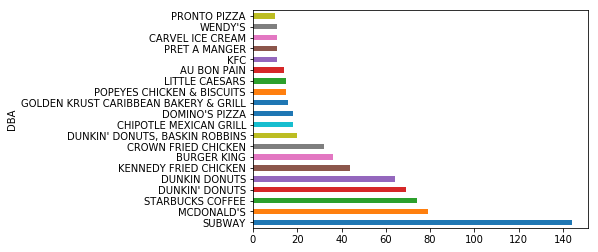

In [19]:
df[df['DBA'].isin(chains.index.values)].groupby('DBA')['RESTAURANT'].nunique().sort_values(ascending = False)[:20].plot(kind = 'barh')

# 5 What fraction of all restaurants are chains?

In [126]:
# Check if a name is a chain, if yes calculate no of unique restaurants forming chain/ total no of restaurants
float(df[df['DBA'].isin(chains.index)]['RESTAURANT'].nunique())/len(df['RESTAURANT'].drop_duplicates(keep = 'first'))

0.16472216729286138

# 6 Plot the number of non-chain restaurants in each boro

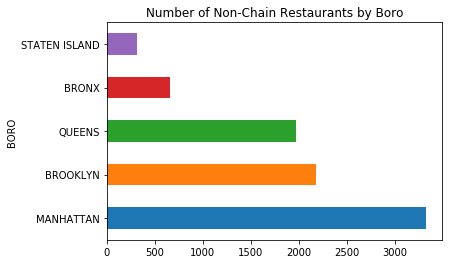

In [127]:
non_chain = df1[df1 ==1].index # Check if the number of restaurants for each name is equal to 1 (not a chain then)

# If the restaurant name is not a chain then count number of such non chain restaurants for each borrow and plot them
df[df['DBA'].isin(non_chain)].groupby('BORO')['RESTAURANT'].nunique().sort_values(ascending = False).plot(kind='barh', title ='Number of Non-Chain Restaurants by Boro')


# 7 Plot the fraction of non-chain restaurants in each boro.

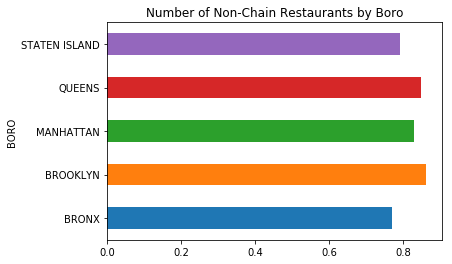

In [128]:
# Get the count of all restaurants which are not part of any chain by boro
non_chain_by_boro = df[df['DBA'].isin(non_chain)].groupby('BORO')['RESTAURANT'].nunique()

# Get the total number of restaurants for each boro
total_rest_by_boro = df.groupby('BORO')['RESTAURANT'].nunique()

# plot the non-chain restaurants by total restuarants for each BORO
((non_chain_by_boro)/(total_rest_by_boro)).plot(kind='barh', title ='Number of Non-Chain Restaurants by Boro')


# 8 Plot the popularity of cuisines.

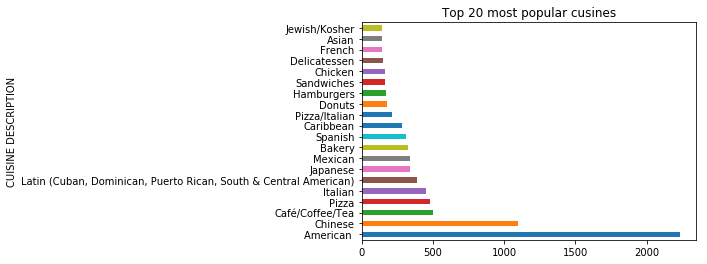

In [129]:
#Identifying number of restaurants in each cuisine
popular_cuisines = df.groupby('CUISINE DESCRIPTION')['RESTAURANT'].nunique() 

#plot top 20 cusines with max number of restaurants
popular_cuisines.sort_values(ascending = False)[:20].plot(kind='barh', title ='Top 20 most popular cusines')

# 9 Plot the cuisines among restaurants which never got cited for violations.

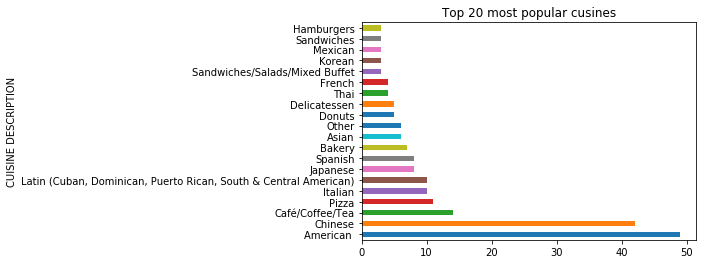

In [130]:
# Counting the number of violation code for each restaurant
no_violations = df.groupby('RESTAURANT')['VIOLATION CODE'].nunique()

# Fitering only those restaurants which have never got cited for violation (i.e violation count is zero)
list1= no_violations[no_violations ==0].index

# For the restaurants indentified above, getting their count by cuisine
no_violations_cuisines=df[df['RESTAURANT'].isin(list1)].groupby('CUISINE DESCRIPTION')['RESTAURANT'].nunique()

# Plot the top 20 cuisines with restuarnts having zero violations
no_violations_cuisines.sort_values(ascending = False)[:20].plot(kind='barh', title ='Top 20 most popular cusines')


# 10 What cuisines tend to be the \cleanest"?

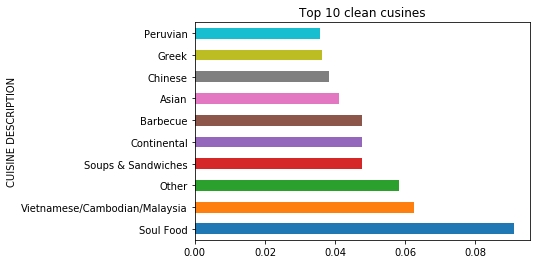

In [131]:
#Identifying the number of restaurants for each cuisine
clean_cuisine1 = df.groupby('CUISINE DESCRIPTION')['RESTAURANT'].nunique()

# Selecting the cuisines with more than 19 restaurants
clean_cuisine_list = clean_cuisine1[clean_cuisine1 > 19].index

# Calculate ratio of no violations cuisines series and popular cuisines series
final_clean_list = no_violations_cuisines/popular_cuisines
final_clean_list[clean_cuisine_list].sort_values(ascending = False)[:10].plot(x = 'CUISINE DESCRIPTION', y='RATIO',kind='barh', title ='Top 10 clean cusines')

# 11 What are the most common violations in each borough?

In [132]:
# Create a crosstable with different violations for each BORO
crosstable = pd.crosstab(df['BORO'],df['VIOLATION DESCRIPTION'] , dropna = True)

# Get the frequently occuring violation type for each BORO
crosstable.idxmax(axis = 1)

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

# 12 What are the most common violations per borough,after normalizing for the relative abundance of each violation?

In [133]:
# getting frequency count/value count for each violation type
overall_freq = df['VIOLATION DESCRIPTION'].value_counts()

# normalizing the crosstable entries by dividing by overall fre count for each violation type
crosstable1 = crosstable/overall_freq

# Identifying the most common violation type for each BORO
crosstable1.idxmax(axis = 1)

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

# 13 How many phone area codes correspond to a single zipcode?

In [134]:
# extracting the first 3 digits in phone number and storing it as area code
df['AreaCode'] = df['PHONE'].astype(str).str[0:3]

# Getting count of these area codes by zipcode
area_zip = df.groupby('AreaCode')['ZIPCODE'].nunique()

# Counting the cases where there is only one area code for each zipcode
len(area_zip[area_zip ==1])

34

# 14 Find common misspellings of street names

In [135]:
# Storing last word in street name as street type
df['STREET TYPE'] = df['STREET'].str.split(' ').str[-1]

# Storing all the words except for last word in street name as street base
df['STREET BASE'] = df['STREET'].str.split(' ').str[0:-1] # list of all words excluding the last word
df['STREET BASE'] = df['STREET BASE'].apply(' '.join) # converting list of strings into string

# Concat Street Base and Zipcode to get Street Base Zip
df['STREET BASE ZIP'] = df['STREET BASE'] + df['ZIPCODE']

# Create a new dataframe with all the above three columns
df_new = df[['STREET TYPE','STREET BASE','STREET BASE ZIP']].copy()

# removing duplicates from the new dataframe
df_new.drop_duplicates(inplace = True)

# drop all the rows with NAs
df_new.dropna()

# Self join this dataframe on street abse zip
df_new1 = df_new.merge(df_new, how = "inner",left_on = "STREET BASE ZIP", right_on = "STREET BASE ZIP", suffixes=['_first', '_second'])

# Create a mask for those rows where the street name are different
mask = df_new1['STREET TYPE_first'] != df_new1['STREET TYPE_second']

# Select only the masked rows
df_new2 = df_new1[mask]

# Create a crosstab with two different street types for the same street base zip
crosstable1 = pd.crosstab(df_new2['STREET TYPE_first'],df_new2['STREET TYPE_second'] , dropna = True)

#Use this to view the entire crosstable
crosstable1 

crosstable1.loc[['AVE','ST','RD','PL','BOULEARD','BULEVARD']].idxmax(axis = 1)


STREET TYPE_first
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object